# Portugal Bank Marketing
___
### Dataset Description :
To predict whether the client has subscribed a term deposit

In [29]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading and displaying the dataset
df=pd.read_csv('E:/Paper1/bank.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#Getting the shape of the dataset
df.shape

(41188, 21)

In [4]:
#Details about each and every column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Q1. Primary analysis of several categorical features

In [5]:
#Extracting the names of categorical column
cat_col=df.select_dtypes(include=['object']).columns.tolist()
cat_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

<AxesSubplot:xlabel='y', ylabel='count'>

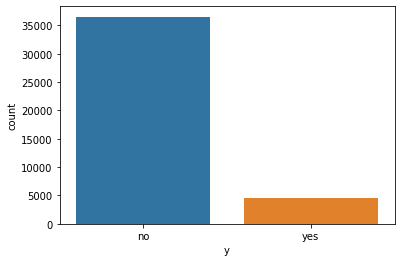

In [6]:
#Checking whether the data is balanced or imbalanced
sns.countplot(x=df.y)

From the above plot we can see clearly that the dataset is highly imbalanced as the classes are not evenly distributed

<AxesSubplot:title={'center':'Monthwise client count'}, xlabel='month'>

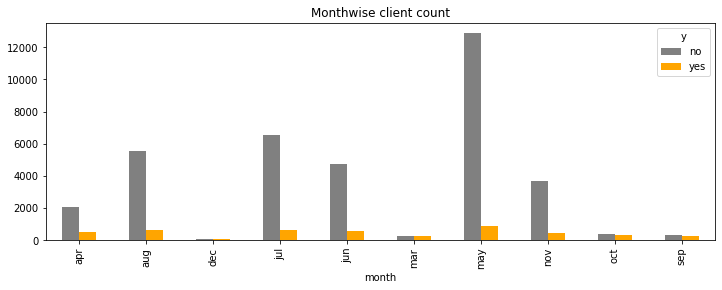

In [7]:
pd.crosstab(df.month, df.y).plot.bar(figsize=(12,4),title='Monthwise client count',color=['grey','orange'])

<AxesSubplot:title={'center':'Education of client'}, xlabel='education'>

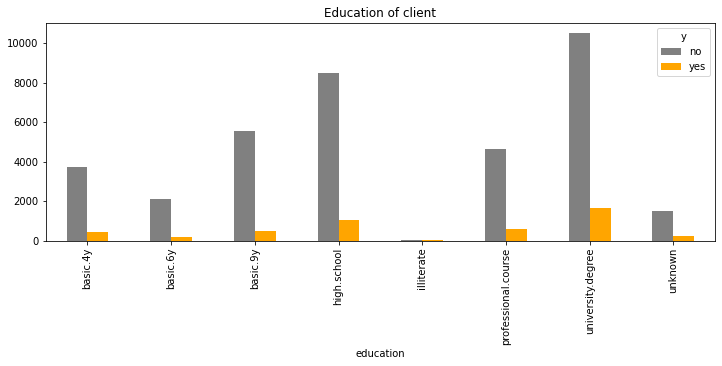

In [8]:
pd.crosstab(df.education, df.y).plot.bar(figsize=(12,4),title='Education of client',color=['grey','orange'])

<AxesSubplot:title={'center':'Marital status of the client'}, xlabel='marital'>

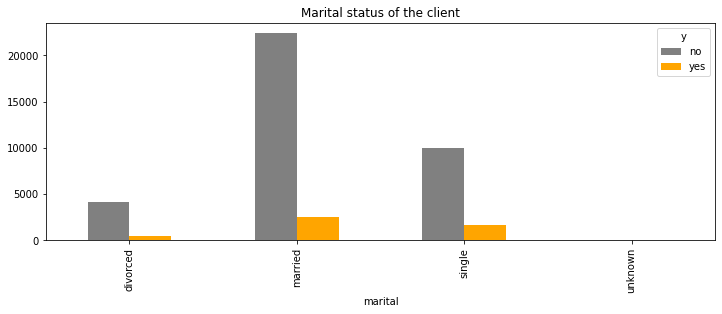

In [9]:
pd.crosstab(df.marital, df.y).plot.bar(figsize=(12,4),title='Marital status of the client',color=['grey','orange'])

## Q2. Exploratory Data Analysis tasks

<AxesSubplot:>

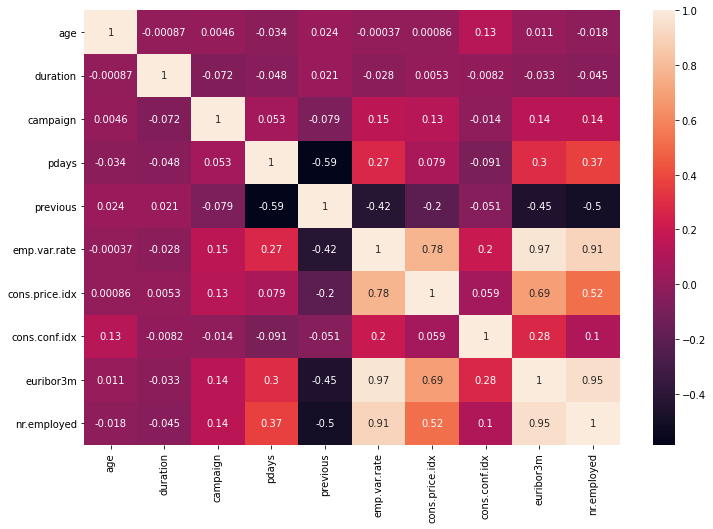

In [10]:
#Checking correlation between variables
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

### a) Missing Value Analysis

In [11]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

From the above result, we can conclude that there are no missing values in the dataset

<AxesSubplot:>

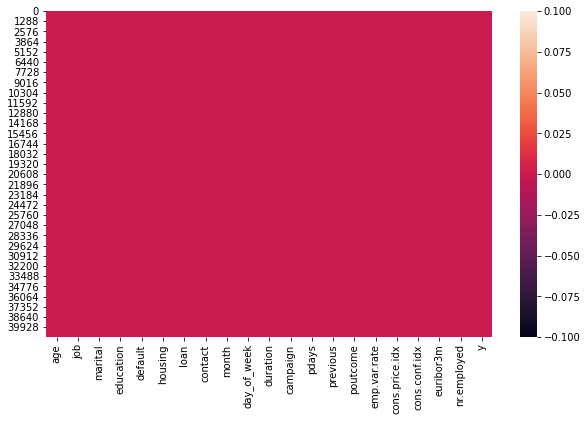

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

### b) Label Encoding

In [13]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in cat_col:
    df[i]= label_encoder.fit_transform(df[i])

In [14]:
df.dtypes

age                 int64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int32
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int32
dtype: object

### c) Selecting important features based on Random Forest

In [15]:
X=df.drop("y",axis=1)
y=df["y"]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [17]:
#Building Random forest regression model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, 
                             min_samples_split=4,
                             max_depth=40,
                             criterion='entropy',
                             random_state=0, 
                             n_jobs=-4, verbose =1)
rfc.fit(X_train, y_train)
#Train data
print("Train Score: ",rfc.score(X_train,y_train))
print("Test Score: ",rfc.score(X_test,y_test))

[Parallel(n_jobs=-4)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=-4)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-4)]: Done 190 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-4)]: Done 440 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-4)]: Done 500 out of 500 | elapsed:    4.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s


Train Score:  0.9960806076792341


[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.3s


Test Score:  0.9173747673383508


[Parallel(n_jobs=5)]: Done 500 out of 500 | elapsed:    0.3s finished


In [18]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators=500, 
                             min_samples_split=4,
                             max_features=23,
                             max_depth=40,
                             criterion='entropy',
                             random_state=0, 
                             n_jobs=-4, verbose =1))
sel.fit(X_train, y_train)
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

[Parallel(n_jobs=-4)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=-4)]: Done  40 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-4)]: Done 190 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-4)]: Done 440 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-4)]: Done 500 out of 500 | elapsed:   14.6s finished


5
Index(['age', 'duration', 'cons.conf.idx', 'euribor3m', 'nr.employed'], dtype='object')


In [19]:
df1=df[['age', 'duration', 'cons.conf.idx', 'euribor3m', 'nr.employed','y']]

### d) Handling unbalanced data using SMOTE

<AxesSubplot:xlabel='y', ylabel='count'>

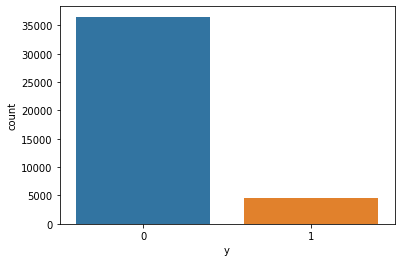

In [20]:
#Before applying SMOTE
sns.countplot(x=df1.y)

In [21]:
X=df1.drop("y",axis=1)
y=df1["y"]

In [22]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X, y = sm.fit_resample(X, y.ravel())

<AxesSubplot:ylabel='count'>

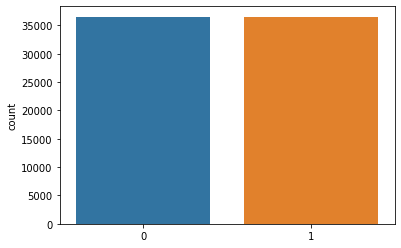

In [23]:
#After applying SMOTE
sns.countplot(x=y)

From the above graph , it it clearly showing that the data is perfectly balanced

### e) Standardizing the data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
#Scaling the dataset 
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)

## Q3. Building several Supervised Learning models

#### a) Logistic Regression

In [26]:
#Fitting the data with model
model=LogisticRegression(solver='lbfgs')
model.fit(X_train,Y_train)
print("Train Score: ",model.score(X_train,Y_train))
print("Test Score: ",model.score(X_test,Y_test))

Train Score:  0.8413039654464792
Test Score:  0.8401203885266086


<AxesSubplot:>

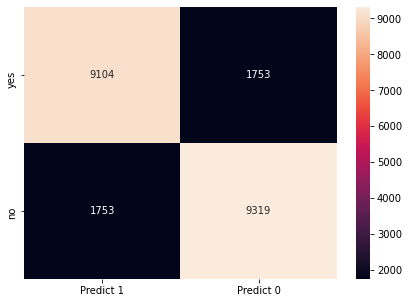

In [27]:
predictions=model.predict(X_test)
cm=metrics.confusion_matrix(Y_test,predictions)

df_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [30]:
fp_lr= cm[0][1]
accuracy_lr = accuracy_score(Y_test,predictions)

In [31]:
print(metrics.classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     10857
           1       0.84      0.84      0.84     11072

    accuracy                           0.84     21929
   macro avg       0.84      0.84      0.84     21929
weighted avg       0.84      0.84      0.84     21929



#### b) Ada Boost

In [32]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,Y_train)
print("Train Score: ",abc.score(X_train,Y_train))
print("Test Score: ",abc.score(X_test,Y_test))

Train Score:  0.8873492680829441
Test Score:  0.8842628482830954


<AxesSubplot:>

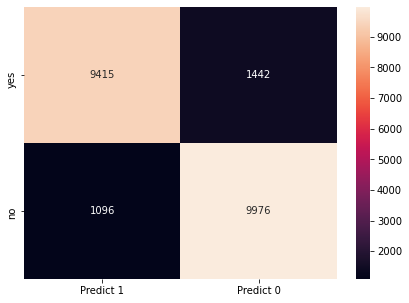

In [33]:
predictions=abc.predict(X_test)
cm=metrics.confusion_matrix(Y_test,predictions)

df_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [34]:
fp_abc= cm[0][1]
accuracy_abc = accuracy_score(Y_test,predictions)

In [35]:
print(metrics.classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88     10857
           1       0.87      0.90      0.89     11072

    accuracy                           0.88     21929
   macro avg       0.88      0.88      0.88     21929
weighted avg       0.88      0.88      0.88     21929



#### C) Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)
print("Train Score: ",model.score(X_train,Y_train))
print("Test Score: ",model.score(X_test,Y_test))

Train Score:  0.8413039654464792
Test Score:  0.8401203885266086


<AxesSubplot:>

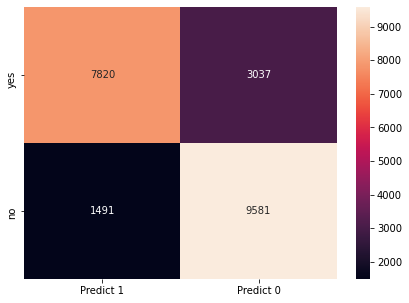

In [37]:
predictions=nb.predict(X_test)
cm=metrics.confusion_matrix(Y_test,predictions)

df_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [38]:
fp_nb= cm[0][1]
accuracy_nb= accuracy_score(Y_test,predictions)

In [39]:
print(metrics.classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78     10857
           1       0.76      0.87      0.81     11072

    accuracy                           0.79     21929
   macro avg       0.80      0.79      0.79     21929
weighted avg       0.80      0.79      0.79     21929



#### d) KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=17,
    p=2)
knn.fit(X_train, Y_train)
 
print("Train Score: ",knn.score(X_train,Y_train))
print("Test Score: ",knn.score(X_test,Y_test))

Train Score:  0.9040397130963316
Test Score:  0.8954352683660906


<AxesSubplot:>

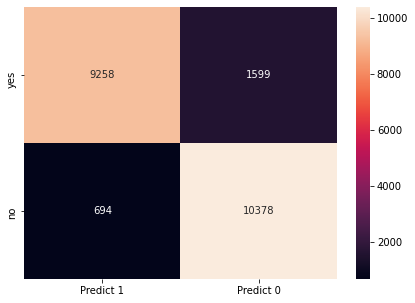

In [41]:
predictions=knn.predict(X_test)
cm=metrics.confusion_matrix(Y_test,predictions)

df_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [42]:
fp_knn= cm[0][1]
accuracy_knn= accuracy_score(Y_test,predictions)

In [43]:
print(metrics.classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89     10857
           1       0.87      0.94      0.90     11072

    accuracy                           0.90     21929
   macro avg       0.90      0.90      0.90     21929
weighted avg       0.90      0.90      0.90     21929



#### e) SVM

In [44]:
from sklearn.svm import SVC # "Support vector classifier"
svcc = SVC(kernel = 'linear', C = 3)
svcc.fit(X_train,Y_train)
print("Train Score: ",svcc.score(X_train,Y_train))
print("Test Score: ",svcc.score(X_test,Y_test))

Train Score:  0.8456231555494752
Test Score:  0.8434037119795704


<AxesSubplot:>

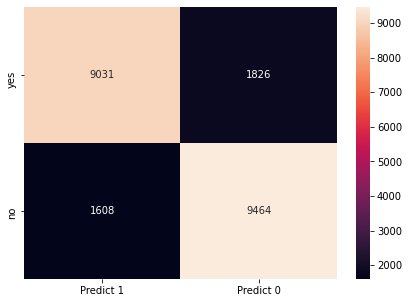

In [45]:
predictions=svcc.predict(X_test)
cm=metrics.confusion_matrix(Y_test,predictions)

df_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [46]:
fp_svm= cm[0][1]
accuracy_svm= accuracy_score(Y_test,predictions)

In [47]:
print(metrics.classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     10857
           1       0.84      0.85      0.85     11072

    accuracy                           0.84     21929
   macro avg       0.84      0.84      0.84     21929
weighted avg       0.84      0.84      0.84     21929



## Q4. Model Inference

In [51]:
inf=[['Logistic Regression',fp_lr,accuracy_lr],
   ['AdaBoost',fp_abc,accuracy_abc],
   ['Naive bayes',fp_nb,accuracy_nb],
   ['KNN',fp_knn,accuracy_knn],
   ['SVM',fp_svm,accuracy_svm]]
inf = pd.DataFrame(inf, columns = ['Model','FP','Accuracy'])
inf

,Model,FP,Accuracy
0,Logistic Regression,1753,0.840120
1,AdaBoost,1442,0.884263
2,Naive bayes,3037,0.793515
3,KNN,1599,0.895435
4,SVM,1826,0.843404


From the above table, SVM and ADA Boosting classifier has the highest accuracy and low False Positive count than other models.

